In [1]:
# Importing necessary library
import numpy as np

# Function to calculate minimum edit distance using dynamic programming
def min_edit_distance(str1, str2):
    # Get lengths of both strings
    m = len(str1)
    n = len(str2)
    
    # Create a matrix to store results of subproblems
    dp = np.zeros((m + 1, n + 1))

    # Initialize dp matrix
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:  # If first string is empty, insert all characters of second string
                dp[i][j] = j  # Min operations = j
            elif j == 0:  # If second string is empty, remove all characters of first string
                dp[i][j] = i  # Min operations = i
            elif str1[i-1] == str2[j-1]:  # If last characters are the same, no operation is needed
                dp[i][j] = dp[i-1][j-1]
            else:
                # If last characters are different, consider all possibilities: insert, remove, replace
                dp[i][j] = 1 + min(dp[i-1][j],    # Remove
                                   dp[i][j-1],    # Insert
                                   dp[i-1][j-1])  # Replace
    
    # Print the matrix
    print(f"Matrix for comparison between '{str1}' and '{str2}':")
    print(dp)
    
    # Return the minimum edit distance
    return dp[m][n]

In [2]:
# List of string pairs to compare
strings = [
    ("Rochester", "Portchester"),
    ("Deadline", "Breadline"),
    ("Reversal", "Referral"),
    ("Levenshtein", "Frankenstein")
]

In [3]:
# Calculate minimum edit distance for each pair of strings
for str1, str2 in strings:
    print(f"\nComparing '{str1}' and '{str2}':")
    distance = min_edit_distance(str1, str2)
    print(f"Minimum edit distance between '{str1}' and '{str2}' is: {distance}\n")


Comparing 'Rochester' and 'Portchester':
Matrix for comparison between 'Rochester' and 'Portchester':
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 2.  2.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  3.  2.  2.  3.  3.  4.  5.  6.  7.  8.  9.]
 [ 4.  4.  3.  3.  3.  4.  3.  4.  5.  6.  7.  8.]
 [ 5.  5.  4.  4.  4.  4.  4.  3.  4.  5.  6.  7.]
 [ 6.  6.  5.  5.  5.  5.  5.  4.  3.  4.  5.  6.]
 [ 7.  7.  6.  6.  5.  6.  6.  5.  4.  3.  4.  5.]
 [ 8.  8.  7.  7.  6.  6.  7.  6.  5.  4.  3.  4.]
 [ 9.  9.  8.  7.  7.  7.  7.  7.  6.  5.  4.  3.]]
Minimum edit distance between 'Rochester' and 'Portchester' is: 3.0


Comparing 'Deadline' and 'Breadline':
Matrix for comparison between 'Deadline' and 'Breadline':
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [2. 2. 2. 2. 3. 4. 5. 6. 7. 8.]
 [3. 3. 3. 3. 2. 3. 4. 5. 6. 7.]
 [4. 4. 4. 4. 3. 2. 3. 4. 5. 6.]
 [5. 5. 5. 5. 4. 3. 2. 3. 4. 5.]
 [6. 6. 6. 6. 5. 4. 3.

In [4]:
# Importing required libraries
import pandas as pd
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/charan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
data = pd.read_csv('/Users/charan/Desktop/Lab 2/American-English.tsv', sep='\t', header=None)
data = data[1] 

In [6]:
# Convert the dataframe column to a list of sentences
sentences = data.tolist()

In [7]:
# Tokenizing each sentence and generating bigrams
all_bigrams = []
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    bigrams = list(ngrams(tokens, 2))
    all_bigrams.extend(bigrams)

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Get the top 20 most frequent bigrams
top_20_bigrams = bigram_counts.most_common(20)

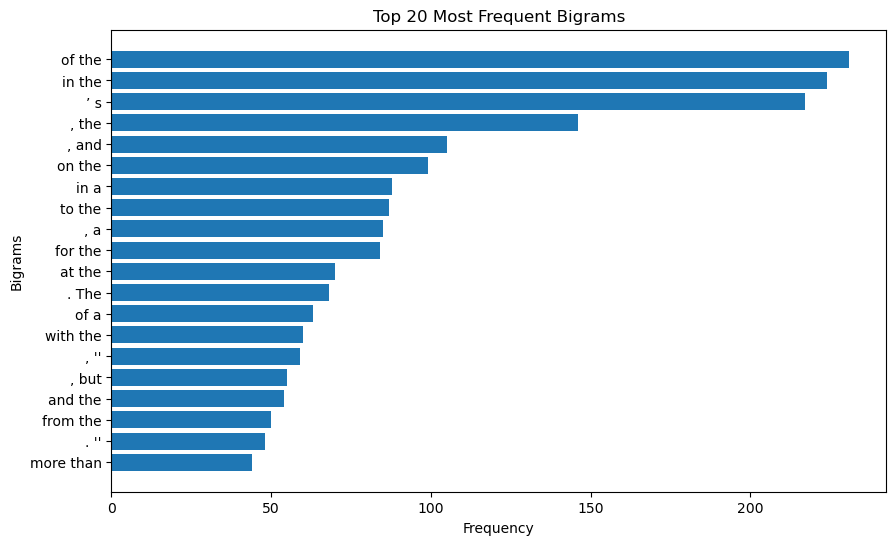

In [8]:
# Plotting the top 20 most frequent bigrams
plt.figure(figsize=(10, 6))
bigram_labels, bigram_values = zip(*top_20_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]
plt.barh(bigram_labels, bigram_values)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Most Frequent Bigrams')
plt.gca().invert_yaxis()
plt.show()


In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
# Generate bigrams while removing stopwords
filtered_bigrams = []
for sentence in sentences:
    tokens = [word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words]
    bigrams = list(ngrams(tokens, 2))
    filtered_bigrams.extend(bigrams)

# Count the frequency of the filtered bigrams
filtered_bigram_counts = Counter(filtered_bigrams)

# Get the top 20 most frequent filtered bigrams
top_20_filtered_bigrams = filtered_bigram_counts.most_common(20)

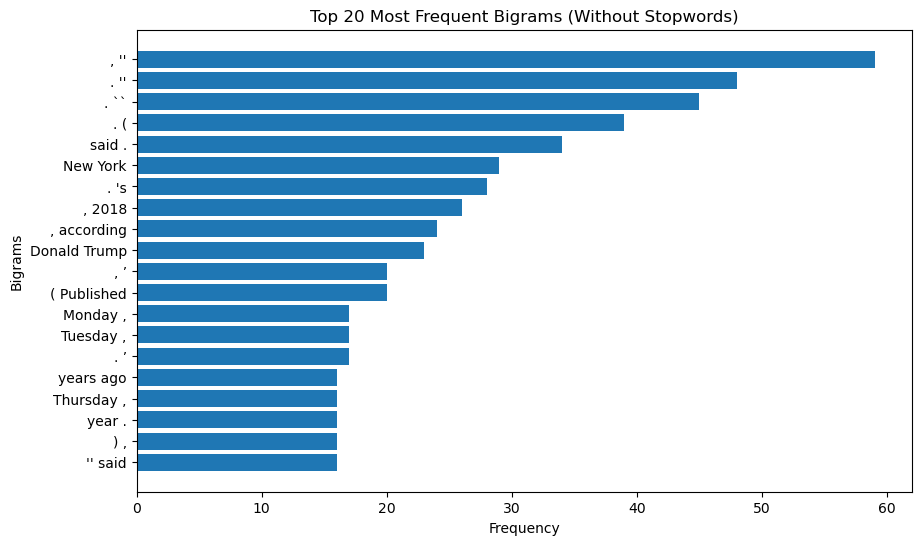

In [11]:
# Plotting the top 20 most frequent bigrams without stopwords
plt.figure(figsize=(10, 6))
filtered_bigram_labels, filtered_bigram_values = zip(*top_20_filtered_bigrams)
filtered_bigram_labels = [' '.join(bigram) for bigram in filtered_bigram_labels]
plt.barh(filtered_bigram_labels, filtered_bigram_values)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Most Frequent Bigrams (Without Stopwords)')
plt.gca().invert_yaxis()
plt.show()